In [38]:
from monai.data.image_reader import nib

In [37]:
import pickle

# 加载pickle文件
with open('../demo3/plans_3d_lowres.pkl', 'rb') as f:
    data = pickle.load(f)
# 现在data是被存储在pickle文件中的原始Python对象
print(data["plans_per_stage"]   )


{0: {'batch_size': 2, 'num_pool_per_axis': [5, 5, 5], 'patch_size': array([128, 128, 128], dtype=int64), 'median_patient_size_in_voxels': array([206, 201, 201], dtype=int64), 'current_spacing': array([1.990695  , 1.99066952, 1.99066952]), 'original_spacing': array([0.78126, 0.78125, 0.78125]), 'do_dummy_2D_data_aug': False, 'pool_op_kernel_sizes': [[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]], 'conv_kernel_sizes': [[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]]}, 1: {'batch_size': 2, 'num_pool_per_axis': [5, 5, 5], 'patch_size': array([128, 128, 128], dtype=int64), 'median_patient_size_in_voxels': array([525, 512, 512], dtype=int64), 'current_spacing': array([0.78126, 0.78125, 0.78125]), 'original_spacing': array([0.78126, 0.78125, 0.78125]), 'do_dummy_2D_data_aug': False, 'pool_op_kernel_sizes': [[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2]], 'conv_kernel_sizes': [[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]]}}


In [49]:
nii_img = nib.load("F:\KiTS23\kits23\dataset\case_00210\segmentation.nii.gz")
img_data = nii_img.get_fdata()
# 有多少种不同的值
print(set(img_data.flatten()))

{0.0, 1.0, 2.0}


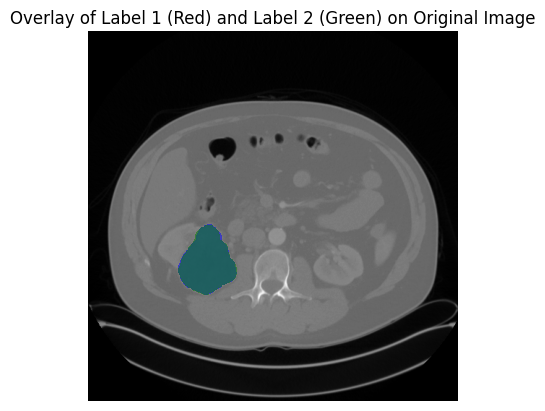

In [65]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 加载原始图像和两个标签
original_img_nii = nib.load('../demo3/imaging.nii.gz')
label1_nii = nib.load('../demo3/lowres_seg.nii.gz')
label2_nii = nib.load('../demo3/cascade_seg.nii.gz')
ground_truth = nib.load('../demo3/segmentation.nii.gz')

# 将nii文件转换为数组
original_img = original_img_nii.get_fdata()
label1 = label1_nii.get_fdata()
label2 = label2_nii.get_fdata()
ground_truth = ground_truth.get_fdata()

# 选择要显示的切片索引
slice_idx = original_img.shape[2] // 2  # 比如选择中间的切片

# 取得对应的切片数据
original_slice = original_img[23, :, :]
label1_slice = label1[23, :, :]
label2_slice = label2[23, :, :]
ground_truth_slice = ground_truth[23, :, :]

# 创建颜色映射
cmap1 = ListedColormap(['none', 'red'])
cmap2 = ListedColormap(['none', 'green'])
cmap3 = ListedColormap(['none', 'blue'])


# 绘制原始图像
plt.imshow(original_slice, cmap='gray')

plt.imshow(np.ma.masked_where(ground_truth_slice == 0, ground_truth_slice), cmap=cmap3, alpha=0.5)
# 叠加标签1，使用红色表示
# plt.imshow(np.ma.masked_where(label1_slice == 0, label1_slice), cmap=cmap1, alpha=0.5)
# 叠加标签2，使用绿色表示
plt.imshow(np.ma.masked_where(label2_slice == 0, label2_slice), cmap=cmap2, alpha=0.5)
# 叠加地面真实标签，使用蓝色表示



# 图例和显示设置
plt.title('Overlay of Label 1 (Red) and Label 2 (Green) on Original Image')
plt.axis('off')  # 关闭坐标轴
plt.show()